# Cloaking Functions Talk Plots

## 30th August 2017


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
y = np.asarray([1, 2])[:, None]
x= np.asarray([1, 2])[:, None]
x_star = np.linspace(0, 3, 100)[:, None]
x_test = np.asarray([0.9, 2.5])[:, None]

Create some helper functions for a simple Gaussian process.

In [3]:
def rbf(x, xprime, lengthscale=1):
    diff = x-xprime
    return np.exp(-0.5*np.sum(diff*diff)/lengthscale**2)

def compute_kernel(kernel, X, Xprime, **kwargs):
    K = np.zeros((X.shape[0], Xprime.shape[0]))
    for i in range(X.shape[0]):
        for j in range(Xprime.shape[0]):
            K[i, j] = kernel(X[i, :], Xprime[j, :], **kwargs)
    return K

def fit(y, x, x_star, x_test, lengthscale):
    K = compute_kernel(rbf, x, x, lengthscale=lengthscale)
    Kfstar = compute_kernel(rbf, x_star, x, lengthscale=lengthscale)
    Kftest = compute_kernel(rbf, x_test, x, lengthscale=lengthscale)
    fstar = np.dot(np.dot(Kfstar,np.linalg.inv(K)), y)
    ftest = np.dot(np.dot(Kftest,np.linalg.inv(K)), y)
    return fstar, ftest

Create a helper function for making plots of the GP predictions as individual data points move.

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

def write_fig(filename, fig):
    "Write a figure to file if it doesn't already exist"
    import os
    if not os.path.exists(filename):
        fig.savefig(filename)

def plot_vals(y, yprime, base='tmp', ax=None, fig=None):
    "Helper function to plot predictions for the cloaking functions."
    fstar, ftest = fit(y, x, x_star, x_test, lengthscale=2)
    ax[0].plot(x_star, fstar, linewidth=3)


    ax[0].plot(x, y, 'ro', markersize=10, linewidth=4)
    ax[0].plot(x_test, ftest, 'go', markersize=10, linewidth=4)
    #_ = ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
    ax[0].set_ylim([-0.5, 3])
    write_fig('./diagrams/' + base + '0.svg', fig)

    fstarprime, ftestprime = fit(yprime, x, x_star, x_test, lengthscale=2)

    # Plot predictions
    ax[0].plot(x, yprime, 'ro', markersize=10, linewidth=4)
    ax[0].plot(x_star, fstarprime, linewidth=3)
    ax[0].plot(x_test, ftestprime, 'go', markersize=10, linewidth=4)
    write_fig('./diagrams/' + base + '1.svg', fig)
    ax[0].annotate("", xytext=(x_test[0], ftest[0]), xy=(x_test[0], ftestprime[0]),
            arrowprops=dict(arrowstyle="->"))
    ax[0].text(x_test[0], ftest[0]-0.1, "$f_{1*}$",fontsize=20)
    ax[0].annotate("", xytext=(x_test[1], ftest[1]), xy=(x_test[1], ftestprime[1]),
            arrowprops=dict(arrowstyle="->"))
    ax[0].text(x_test[1], ftest[1]-0.1, "$f_{2*}$",fontsize=20)

    # Plot test point moves.
    ax[1].plot((ftest[0], ftestprime[0]), (ftest[1], ftestprime[1]), 'bo', linewidth=3)
    ax[1].set_xlim(ax[0].get_ylim())
    ax[1].set_ylim(ax[0].get_ylim())
    ax[1].annotate("", xytext=ftest, xy=ftestprime,
            arrowprops=dict(arrowstyle="->"))
    ax[1].set_xlabel("$f_{1*}$",fontsize=20)
    ax[1].set_ylabel("$f_{2*}$",fontsize=20)
    write_fig('./diagrams/' + base + '2.svg', fig)
    return fstar, ftest, ftestprime

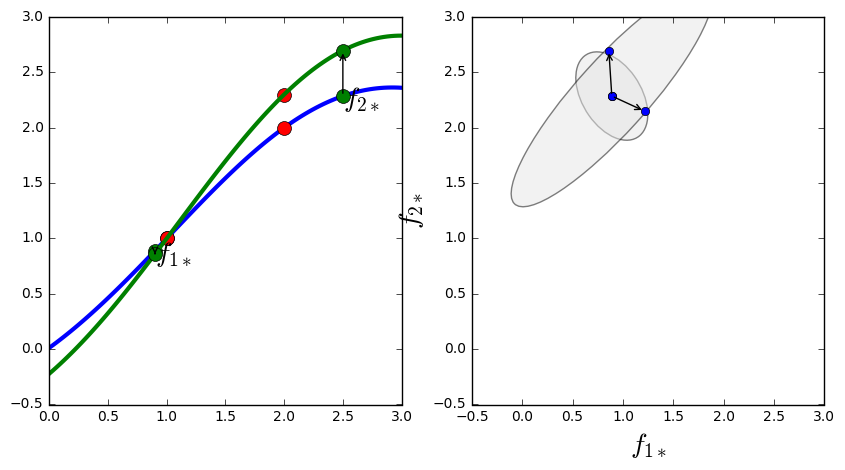

In [9]:

yprime = y + np.asarray([0.3, 0])[:, None]
fig, ax = plt.subplots(1, 2, figsize=(10,5))

fstar, ftest, ftestprime1 = plot_vals(y, yprime, 'dp_firstpoint', ax=ax, fig=fig)
ax[0].cla()
ax[1].plot(1, 1)

yprime = y + np.asarray([0, 0.3])[:, None]
fstar, ftest, ftestprime2 = plot_vals(y, yprime, 'dp_secondpoint', ax=ax, fig=fig)

# Compute the basis of the ellipse for the moved test points
W = np.asarray([(ftestprime2 - ftest).flatten(),
(ftestprime1 - ftest).flatten()])
V, U = np.linalg.eig(np.dot(W, W))
ind = np.argsort(V)[::-1]
V = V[ind]
U = U[ind, :]

from matplotlib.patches import Ellipse
e = Ellipse(xy=ftest.flatten(), width=2*np.sqrt(V[0]), height=2*np.sqrt(V[1]), angle=np.arccos(U[0, 0])*180/(np.pi)) 
ax[1].add_artist(e)
e.set_clip_box(ax[1].bbox)
e.set_alpha(0.5)
e.set_facecolor([0.9, 0.9, 0.9])
write_fig('./diagrams/dp_with_ellipse1.svg', fig)

# Compute the basis of the ellipse for the original kernel.
V, U = np.linalg.eig(compute_kernel(rbf, x, x, lengthscale=2))
ind = np.argsort(V)[::-1]
V = V[ind]
U = U[ind, :]
e2 = Ellipse(xy=ftest.flatten(), width=2*np.sqrt(V[0]), height=2*np.sqrt(V[1]), angle=np.arccos(U[0, 0])*180/(np.pi)) 
ax[1].add_artist(e2)
e2.set_clip_box(ax[1].bbox)
e2.set_alpha(0.5)
e2.set_facecolor([0.9, 0.9, 0.9])
write_fig('./diagrams/dp_with_ellipse2.svg', fig)

## Create Gaussian Process Demo Plots

Create a few samples from a GP covariance.

In [10]:
lengthscale=0.5

K = compute_kernel(rbf, x_star, x_star, lengthscale=lengthscale)

Plot a few samples from the GP.

/Users/neil/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:1: RuntimeWarning: covariance is not positive-semidefinite.
  if __name__ == '__main__':


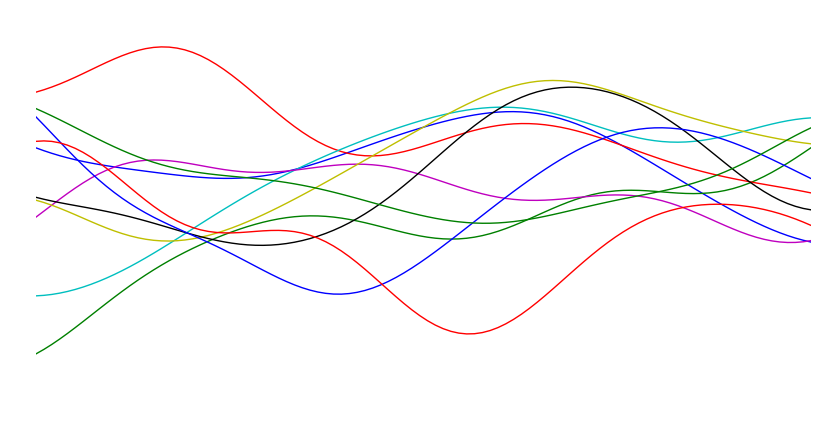

In [11]:
Y = np.random.multivariate_normal(mean=np.zeros(K.shape[0]), cov=K, size=10).T
fig, ax = plt.subplots(figsize=(10,5))
_ = ax.plot(x_star, Y)
ax.axis('off')
write_fig('./diagrams/gp_prior_samples_few.svg', fig)

Plot many samples from the GP.

/Users/neil/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:1: RuntimeWarning: covariance is not positive-semidefinite.
  if __name__ == '__main__':


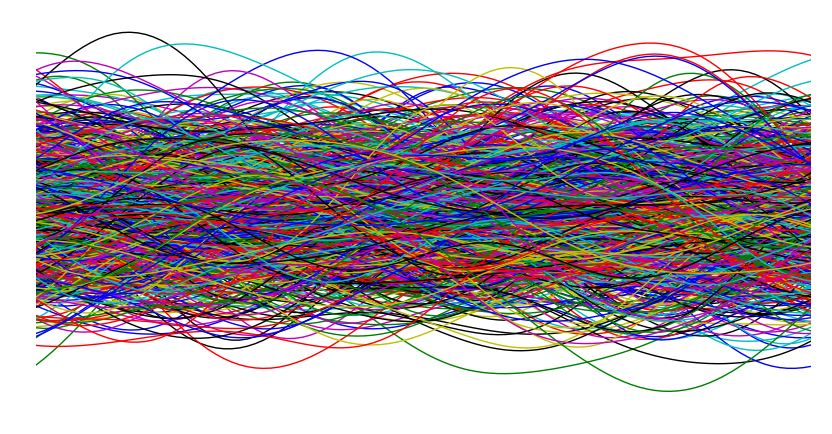

In [12]:
Y = np.random.multivariate_normal(mean=np.zeros(K.shape[0]), cov=K, size=1000).T
fig, ax = plt.subplots(figsize=(10,5))
_ = ax.plot(x_star, Y)
ax.axis('off')
write_fig('./diagrams/gp_prior_samples.svg', fig)

Plot the data and a number of samples.

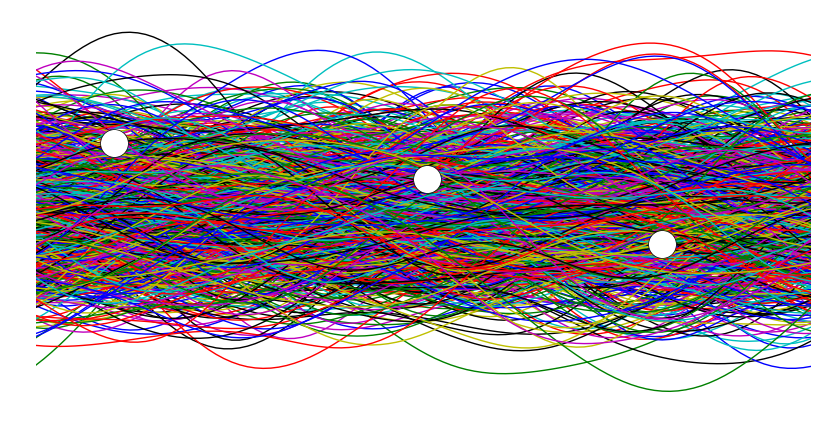

In [13]:
ind = [10, 50, 80]
K_data = compute_kernel(rbf, x_star[ind, :], x_star[ind, :], lengthscale=lengthscale)
Y_data = np.random.multivariate_normal(mean=np.zeros(K_data.shape[0]), cov=K_data, size=1).T
fig, ax = plt.subplots(figsize=(10,5))
_ = ax.plot(x_star, Y)
ax.axis('off')
_ = ax.plot(x_star[ind, :], Y_data, 'wo', markersize=20)
write_fig('./diagrams/gp_prior_samples_data.svg', fig)
ylim = ax.get_ylim()


Plot samples from the GP that are nearest to the training data.

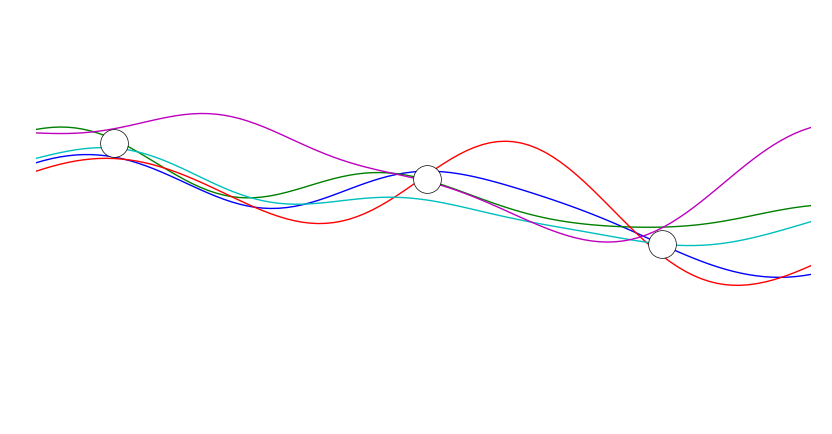

In [14]:
diff = Y[ind, :] - Y_data
keepind = np.argsort(np.sum(diff*diff, 0))[:5]
fig, ax = plt.subplots(figsize=(10,5))
_ = ax.plot(x_star, Y[:, keepind])
ax.set_ylim(ylim)
ax.axis('off')
_ = ax.plot(x_star[ind, :], Y_data, 'wo', markersize=20)
write_fig('./diagrams/gp_rejection_samples.svg', fig)

Plot predictions from the GP alongside the closest samples to the data.

NameError: name 'Kfstar' is not defined

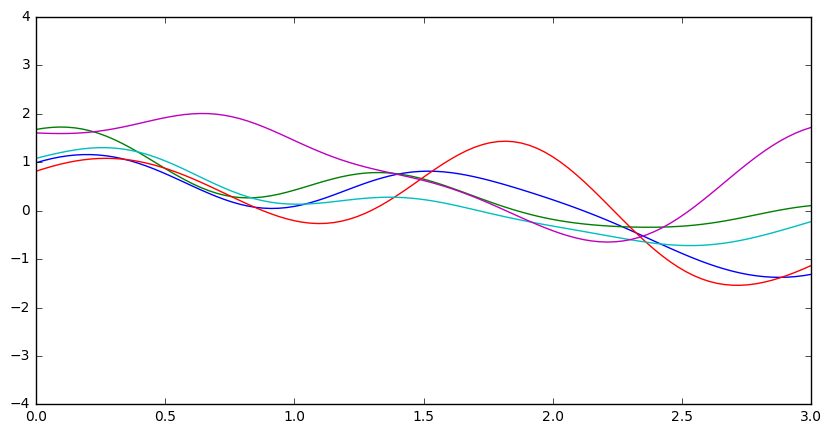

In [15]:
fig, ax = plt.subplots(figsize=(10,5))
_ = ax.plot(x_star, Y[:, keepind])
ax.set_ylim(ylim)
fstar = compute_kernel(rbf, x_star, x_star[ind, :], lengthscale=lengthscale)
KfstarKinv = np.dot(Kfstar, np.linalg.inv(K_data))
pred = np.dot(KfstarKinv, Y_data)
errbar = np.sqrt(np.diag(K) - np.sum(KfstarKinv*Kfstar, 1))[:, None]
ax.plot(x_star, pred, 'b-', linewidth=4)
ax.fill_between(x_star.flatten(), (pred+2*errbar).flatten(), (pred-2*errbar).flatten(), facecolor='gray', alpha=0.5)
ax.axis('off')
_ = ax.plot(x_star[ind, :], Y_data, 'wo', markersize=20)
write_fig('./diagrams/gp_prediction.svg', fig)